In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.insert(0, "/home/lars/libraries/keras/")
from keras.preprocessing.image import *

Using TensorFlow backend.


In [2]:
img = np.zeros((1000,1000,3))
img[400:600, 400:600, :]=1

img[300:400, 100:200, :]=1

In [3]:
def draw_boxes(img, boxes, size=10):
    draw_img = img.copy()
    for box in boxes:
        x_min, y_min, x_max, y_max = box
        dim_x, dim_y = draw_img.shape[:2]
        x_min = int(x_min * dim_x)
        x_max = int(x_max * dim_x)
        y_min = int(y_min * dim_y)
        y_max = int(y_max * dim_y)
        
        x_min = max(0, x_min)
        x_max = min(dim_x, x_max)
        y_min = max(0, y_min)
        y_max = min(dim_y, y_max)

        draw_img[x_min:x_min+size, y_min:y_max]=[1,0,0]
        draw_img[x_max-size:x_max, y_min:y_max]=[1,0,0]
        draw_img[x_min:x_max, y_min:y_min+size]=[1,0,0]
        draw_img[x_min:x_max, y_max-size:y_max]=[1,0,0]
    return draw_img

def draw_verts(img, verts, size=10):
    draw_img = img.copy()
    for vert in verts:
        
        x, y = vert
        dim_x, dim_y = draw_img.shape[:2]
        x_min = int(x * dim_x)
        x_max = int(x * dim_x)
        y_min = int(y * dim_y)
        y_max = int(y * dim_y)
        
        x_min = x_min-size
        x_max = x_max+size
        y_min = y_min-size
        y_max = y_max+size
        
        x_min = max(1, x_min)
        x_max = min(dim_x, x_max)
        y_min = max(1, y_min)
        y_max = min(dim_y, y_max)
        
        draw_img[x_min:x_max, y_min:y_max]=[0,1,0]
    return draw_img

In [4]:
boxes = np.array([[0.4, 0.4, 0.6, 0.6],
                 [0.3, 0.1, 0.4, 0.2]])

vertices = boxes_to_vertices(boxes)
vertices = vertices.reshape((-1, 2))

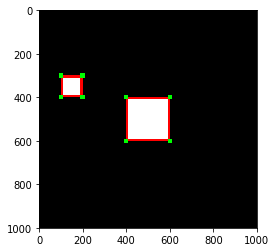

In [5]:
draw_img =draw_boxes(img, boxes, 10)
draw_img = draw_verts(draw_img, vertices, 10)
plt.imshow(draw_img)

In [6]:
new_img = img[:, ::-1]
new_boxes = [(x_min, 1-y_max, x_max, 1-y_min) for (x_min, y_min, x_max, y_max) in boxes]
new_vertices = boxes_to_vertices(np.array(new_boxes)).reshape((-1,2))

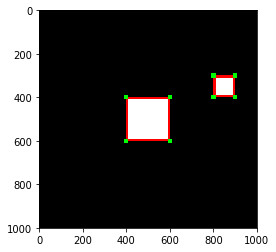

In [7]:
draw_img = draw_boxes(new_img, new_boxes, 10)
draw_img = draw_verts(draw_img, new_vertices, 10)
plt.imshow(draw_img)

In [8]:
new_img, new_boxes, new_vertices = random_rotation_with_boxes(img, boxes, 180, row_axis=0, col_axis=1, channel_axis=2)

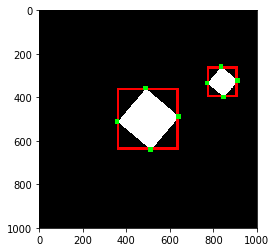

In [9]:
draw_img = draw_boxes(new_img, new_boxes, 10)
draw_img = draw_verts(draw_img, new_vertices, 10)
plt.imshow(draw_img)

In [10]:
new_img, new_boxes, new_vertices = random_zoom_with_boxes(img, boxes, (0.5,1.5), row_axis=0, col_axis=1, channel_axis=2)

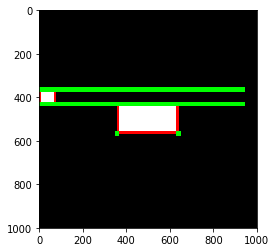

In [11]:
draw_img = draw_boxes(new_img, new_boxes, 10)
draw_img = draw_verts(draw_img, new_vertices, 10)
plt.imshow(draw_img)

In [60]:
temp_vertices = vertices - [0.5, 0.5]
new_img, new_vertices = random_transform_with_vertices(img, temp_vertices,10, 0.1, 0.1, (0.5,1.5), row_axis=0, col_axis=1, channel_axis=2)
new_vertices = new_vertices + [0.5, 0.5]
new_boxes = vertices_to_boxes(new_vertices)

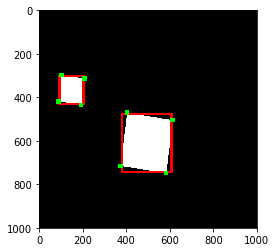

In [61]:
draw_img = draw_boxes(new_img, new_boxes, 10)
draw_img = draw_verts(draw_img, new_vertices, 10)
plt.imshow(draw_img)